### Modelo básico. Decision Tree

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.feature_selection import SelectKBest, f_classif

In [8]:
df = pd.read_csv("../data/processed/processed_new_columns.csv", index_col=0)

In [9]:
df.head(5)

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,artists_frequency,version_type,base_name,version_Live,version_Original,version_Remaster,version_Remix,version_type_encoded,decade
0,0gNNToCW3qjabgTyBSjt3H,!Que Vida! - Mono Version,['Love'],220560,11/1/66,1966,0.5250,0.600,0.540,0.00305,0.100,-11.803,0.0328,125.898,0.547,1,9,26,0,51,Original,!Que Vida! - Mono Version,0,1,0,0,1,1960
1,0tMgFpOrXZR6irEOLNWwJL,"""40""",['U2'],157840,2/28/83,1983,0.2280,0.368,0.480,0.70700,0.159,-11.605,0.0306,150.166,0.338,1,8,21,0,218,Original,"""40""",0,1,0,0,1,1980
2,2ZywW3VyVx6rrlrX75n3JB,"""40"" - Live",['U2'],226200,8/20/83,1983,0.0998,0.272,0.684,0.01450,0.946,-9.728,0.0505,143.079,0.279,1,8,41,0,218,Live,"""40"" -",1,0,0,0,0,1980
3,6DdWA7D1o5TU2kXWyCLcch,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,37,0,218,Remaster,"""40"" - 2008",0,0,1,0,2,1980
4,3vMmwsAiLDCfyc1jl76lQE,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,35,0,218,Remaster,"""40"" - 2008",0,0,1,0,2,1980


Comenzamos tomando la decisión de centrarnos en las décadas desde 1950 hasta la de 2010, ambas incluidas. Esta decisión se fundamenta en dos motivos principales:

- Motivo estadístico: El análisis descriptivo previo nos ha mostrado una descompensación de datos en función de las décadas. El periodo escogido sí tiene una representación equilibrada.
- Motivo de negocio: Si el objetivo es que personas de edad avanzada puedan escuchar canciones de ahora que suenan a décadas pasadas, esas en las que ellos eran más jóvenes y descubrían nueva música, contar con décadas anteriores a los 50 no tendría mucho sentido por el propio perfil (edad) de los usuarios.

In [10]:
#Incluimos solo canciones entre las décadas de 1950 y 2010
df = df[(df['decade'] >= 1950) & (df['decade'] <= 2010)]

In [11]:
df.head(5)

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,artists_frequency,version_type,base_name,version_Live,version_Original,version_Remaster,version_Remix,version_type_encoded,decade
0,0gNNToCW3qjabgTyBSjt3H,!Que Vida! - Mono Version,['Love'],220560,11/1/66,1966,0.5250,0.600,0.540,0.00305,0.100,-11.803,0.0328,125.898,0.547,1,9,26,0,51,Original,!Que Vida! - Mono Version,0,1,0,0,1,1960
1,0tMgFpOrXZR6irEOLNWwJL,"""40""",['U2'],157840,2/28/83,1983,0.2280,0.368,0.480,0.70700,0.159,-11.605,0.0306,150.166,0.338,1,8,21,0,218,Original,"""40""",0,1,0,0,1,1980
2,2ZywW3VyVx6rrlrX75n3JB,"""40"" - Live",['U2'],226200,8/20/83,1983,0.0998,0.272,0.684,0.01450,0.946,-9.728,0.0505,143.079,0.279,1,8,41,0,218,Live,"""40"" -",1,0,0,0,0,1980
3,6DdWA7D1o5TU2kXWyCLcch,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,37,0,218,Remaster,"""40"" - 2008",0,0,1,0,2,1980
4,3vMmwsAiLDCfyc1jl76lQE,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,35,0,218,Remaster,"""40"" - 2008",0,0,1,0,2,1980


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139848 entries, 0 to 169906
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    139848 non-null  object 
 1   name                  139848 non-null  object 
 2   artists               139848 non-null  object 
 3   duration_ms           139848 non-null  int64  
 4   release_date          139848 non-null  object 
 5   year                  139848 non-null  int64  
 6   acousticness          139848 non-null  float64
 7   danceability          139848 non-null  float64
 8   energy                139848 non-null  float64
 9   instrumentalness      139848 non-null  float64
 10  liveness              139848 non-null  float64
 11  loudness              139848 non-null  float64
 12  speechiness           139848 non-null  float64
 13  tempo                 139848 non-null  float64
 14  valence               139848 non-null  float64
 15  mode 

In [14]:
df.columns

Index(['id', 'name', 'artists', 'duration_ms', 'release_date', 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit', 'artists_frequency', 'version_type',
       'base_name', 'version_Live', 'version_Original', 'version_Remaster',
       'version_Remix', 'version_type_encoded', 'decade'],
      dtype='object')

In [19]:
X = df[['duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness',
      'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
      'key', 'popularity', 'explicit', 'version_type_encoded']]
y = df['decade']

In [ ]:
#Dividimos en conjuntos para entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [21]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(139848, 15)
(27969, 15)
(111879, 15)
(27969,)
(111879,)


In [22]:
model_1 = DecisionTreeClassifier(random_state=42)

In [ ]:
#Entrenamiento
model_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
#Evaluación

y_pred_1 = model_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)
precision_1 = precision_score(y_test, y_pred_1, average='macro')
recall_1 = recall_score(y_test, y_pred_1, average='macro')
f1_1 = f1_score(y_test, y_pred_1, average='macro')

In [44]:
print("Accuracy del modelo Decision Tree:", accuracy_1)
print("Precisión (Precision):", precision_1)
print("Sensibilidad (Recall):", recall_1)
print("F1-Score:", f1_1)

Accuracy del modelo Decision Tree: 0.430858338025903
Precisión (Precision): 0.43117032448458315
Sensibilidad (Recall): 0.4308084750446472
F1-Score: 0.4309718120962885


<mark>**Observación:**</mark> Rendimiento general bajo. Todas las métricas están alrededor del 43%, lo cual es un indicativo de que el modelo no está funcionando tan bien como se esperaba para predecir las décadas de las canciones.

**Posible causa:** Complejidad de las clases. Podría ser que algunas décadas tengan características muy similares, lo que dificulta la clasificación.

In [30]:
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_1))

Reporte de clasificación:
              precision    recall  f1-score   support

        1950       0.71      0.70      0.71     16051
        1960       0.41      0.42      0.42     15958
        1970       0.32      0.32      0.32     15962
        1980       0.33      0.32      0.33     16011
        1990       0.30      0.30      0.30     15996
        2000       0.37      0.37      0.37     15989
        2010       0.58      0.58      0.58     15912

    accuracy                           0.43    111879
   macro avg       0.43      0.43      0.43    111879
weighted avg       0.43      0.43      0.43    111879



In [ ]:
#Matriz de confusión
print("Matriz de confusión:")
conf_matrix_1 = confusion_matrix(y_test, y_pred_1)
print(conf_matrix_1)

Matriz de confusión:
[[11264  3395   631   361   226   121    53]
 [ 3214  6701  2780  1513   959   538   253]
 [  634  2666  5055  3606  2291  1182   528]
 [  361  1574  3710  5192  3089  1488   597]
 [  233  1012  2271  2999  4824  3129  1528]
 [  100   542  1097  1319  3140  5959  3832]
 [   31   269   490   608  1566  3739  9209]]


<mark>**Observaciones:**</mark>
- **Clase dominante (esquinas):** En las décadas más recientes y antiguas, como en las esquinas de la matriz (la primera y última filas y columnas), se puede ver que el modelo tiene un número notable de clasificaciones correctas, pero también muestra errores considerables.
- **Confusión entre décadas cercanas.** El modelo tiende a confundir décadas consecutivas. Por ejemplo, en las filas centrales (correspondientes a décadas como los 70s, 80s y 90s), hay un número significativo de errores entre décadas vecinas. Esto puede indicar que las características de las canciones de esas décadas son similares, haciendo difícil la distinción.

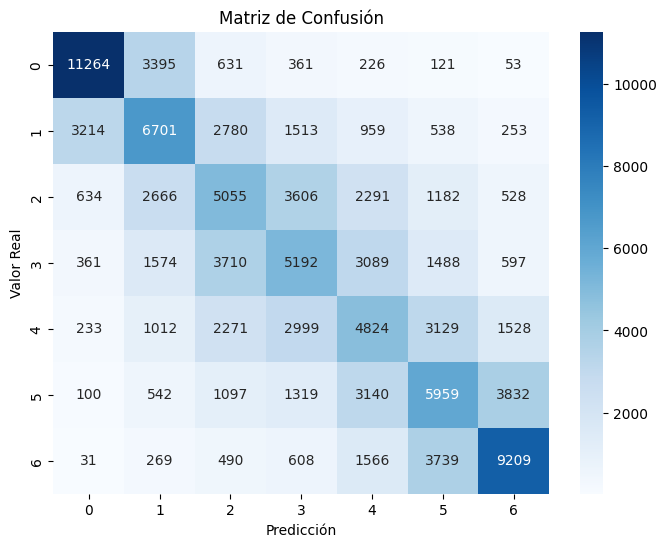

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

In [ ]:
#ROC-AUC multiclase (aunque es una métrica más favorable para modelos de clasificación binaria)
y_test_binarized_1 = label_binarize(y_test, classes=np.unique(y))
y_pred_proba_1 = model_1.predict_proba(X_test)
auc_score_1 = roc_auc_score(y_test_binarized_1, y_pred_proba_1, average='macro')
print("ROC-AUC Score (macro-average):", auc_score_1)

ROC-AUC Score (macro-average): 0.6679766988713915


En un caso multiclase como este, se evalúa la capacidad del modelo para predecir correctamente cada clase en comparación con las demás.

### Optimización 1: Feature importance

In [45]:
feature_importances = model_1.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [47]:
importance_df

,Feature,Importance
12,popularity,0.268431
1,acousticness,0.083092
6,loudness,0.082730
0,duration_ms,0.077231
3,energy,0.067402
9,valence,0.065763
7,speechiness,0.063874
8,tempo,0.063869
2,danceability,0.062153
5,liveness,0.056924


In [69]:
X_reduc = df[['duration_ms', 'acousticness', 'danceability', 'energy', 
              'loudness', 'speechiness', 'tempo', 'valence', 'popularity']]

In [70]:
#Dividimos en conjuntos para entrenamiento y pruebas
X_train_reduc, X_test_reduc, y_train, y_test = train_test_split(X_reduc, y, train_size=0.2, random_state=42)

In [71]:
print(X.shape)
print(X_train_reduc.shape)
print(X_test_reduc.shape)
print(y_train.shape)
print(y_test.shape)

(139848, 15)
(27969, 9)
(111879, 9)
(27969,)
(111879,)


In [72]:
model_2 = DecisionTreeClassifier(random_state=42)

In [73]:
#Entrenamiento
model_2.fit(X_train_reduc, y_train)

DecisionTreeClassifier(random_state=42)

In [74]:
#Evaluación
y_pred_2 = model_2.predict(X_test_reduc)
accuracy_2 = accuracy_score(y_test, y_pred_2)
precision_2 = precision_score(y_test, y_pred_2, average='macro')
recall_2 = recall_score(y_test, y_pred_2, average='macro')
f1_2 = f1_score(y_test, y_pred_2, average='macro')

In [75]:
print("Accuracy del modelo Decision Tree:", accuracy_2)
print("Precisión (Precision):", precision_2)
print("Sensibilidad (Recall):", recall_2)
print("F1-Score:", f1_2)

Accuracy del modelo Decision Tree: 0.4268897648352238
Precisión (Precision): 0.4272418965568066
Sensibilidad (Recall): 0.42683037380347305
F1-Score: 0.42699598355982676


<mark>**Conclusión:**</mark> Haciendo una selección de variables (feature importance > 5) el modelo empeora ligeramente, lo que confirma que estas características tienen una importancia mínima en la predicción de la década.

### Optimización 2: SelectKBest

In [77]:
k = 10
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

In [78]:
print(f"\nCaracterísticas seleccionadas con SelectKBest (top {k}):")
print(selected_features)


Características seleccionadas con SelectKBest (top 10):
Index(['duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'loudness', 'speechiness', 'valence', 'popularity',
       'explicit'],
      dtype='object')


In [79]:
X_train_k, X_test_k, y_train, y_test = train_test_split(X_new, y, train_size=0.2, random_state=42)

In [80]:
print(X.shape)
print(X_train_k.shape)
print(X_test_k.shape)
print(y_train.shape)
print(y_test.shape)

(139848, 15)
(27969, 10)
(111879, 10)
(27969,)
(111879,)


In [81]:
model_3 = DecisionTreeClassifier(random_state=42)

In [82]:
#Entrenamiento
model_3.fit(X_train_k, y_train)

DecisionTreeClassifier(random_state=42)

In [83]:
#Evaluación
y_pred_3 = model_3.predict(X_test_k)
accuracy_3 = accuracy_score(y_test, y_pred_3)
precision_3 = precision_score(y_test, y_pred_3, average='macro')
recall_3 = recall_score(y_test, y_pred_3, average='macro')
f1_3 = f1_score(y_test, y_pred_3, average='macro')

In [84]:
print("Accuracy del modelo Decision Tree:", accuracy_3)
print("Precisión (Precision):", precision_3)
print("Sensibilidad (Recall):", recall_3)
print("F1-Score:", f1_3)

Accuracy del modelo Decision Tree: 0.4313410023328775
Precisión (Precision): 0.4321297697032264
Sensibilidad (Recall): 0.4312822954487129
F1-Score: 0.43169153635189084


<mark>**Conclusión:**</mark> La selección de las mejores características ha tenido un efecto positivo, pero el incremento es marginal. Esto podría significar que la selección de características ayuda a reducir un poco el ruido, pero no es suficiente para un aumento significativo en el rendimiento. Es posible que las características seleccionadas no estén capturando toda la complejidad necesaria para mejorar significativamente el modelo, o que el modelo de Decision Tree tenga limitaciones para manejar este tipo de problema.



### Optimización 3: Hiperparametrización

In [86]:
#Configuración de hiperparámetros para DecisionTree
param_grid = {'max_depth': [5, 10, 15, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

In [87]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_k, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [89]:
# Mostrar los mejores parámetros encontrados
grid_best_params = grid_search.best_params_
print("Mejores hiperparámetros:", grid_best_params)

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [90]:
#Evaluación del modelo
best_model = grid_search.best_estimator_
y_pred_4 = best_model.predict(X_test_k)
accuracy_4 = accuracy_score(y_test, y_pred_4)
precision_4 = precision_score(y_test, y_pred_4, average='macro')
recall_4 = recall_score(y_test, y_pred_4, average='macro')
f1_4 = f1_score(y_test, y_pred_4, average='macro')

In [91]:
print("Accuracy del modelo Decision Tree:", accuracy_4)
print("Precisión (Precision):", precision_4)
print("Sensibilidad (Recall):", recall_4)
print("F1-Score:", f1_4)

Accuracy del modelo Decision Tree: 0.4867133242163409
Precisión (Precision): 0.4878699397583922
Sensibilidad (Recall): 0.48672718428022693
F1-Score: 0.48394776429367525


<mark>**Conclusión:**</mark> La hiperparametrización ha mejorado el modelo de forma significativa, mostrando que ajustar la profundidad a 10, el mínimo de muestras por hoja a 2 y los nodos mínimos a 2 mejora la capacidad de generalización. No obstante, el rendimiento sigue siendo moderado y deberemos probar con otro modelos.